In [1]:
import pandas as pd
data = pd.read_csv("database new.csv")
spark = pd.read_csv("spark.csv", delimiter=";")

In [2]:
data

,i,Action,Industry,Country,ИНН
0,Aalberts,"continue operations on an unspecified ""lower"" ...",Industrials,Netherlands,NaN
1,Abbott Laboratories,suspend non-essential business activity,Health Care,United States,7.725595e+09
2,Abbvie,"suspend aesthetics operations, pause new clini...",Health Care,United States,7.743856e+09
3,Accor,suspend new investments/development,Consumer Discretionary,France,7.704662e+09
4,Accumalux,"still operating plant in Togliatti, Russia",Consumer Discretionary,Luxembourg,6.321414e+09
...,...,...,...,...,...
2018,HMD Global,приняла решение уйти с рынка РФ,Information Technology,Финляндия,7.704376e+09
2019,Heroku,Облачная PaaS-платформа Heroku больше не регис...,Information Technology,США,NaN
2020,Parallels,Компания по разработке программного обеспечени...,Information Technology,США,5.406309e+09
2021,Qt Group,ограничил доступ для российских пользователей,Information Technology,Норвегия,NaN


Rename columns 'i' and 'ИНН' to 'Company' and 'INT'

In [3]:
data = data.rename(columns={'i': 'Company'})
data = data.rename(columns={'ИНН': 'INT'})

Make columns 'Company' and 'Industry' lowercase

In [4]:
data['Company'] = data['Company'].str.lower()
data['Industry'] = data['Industry'].str.lower()

In [5]:
data.dtypes

Company      object
Action       object
Industry     object
Country      object
INT         float64
dtype: object

In [6]:
data.head(5)

,Company,Action,Industry,Country,INT
0,aalberts,"continue operations on an unspecified ""lower"" ...",industrials,Netherlands,NaN
1,abbott laboratories,suspend non-essential business activity,health care,United States,7.725595e+09
2,abbvie,"suspend aesthetics operations, pause new clini...",health care,United States,7.743856e+09
3,accor,suspend new investments/development,consumer discretionary,France,7.704662e+09
4,accumalux,"still operating plant in Togliatti, Russia",consumer discretionary,Luxembourg,6.321414e+09


# Spark database

In [7]:
spark.head()

,№,Наименование,Регистрационный номер,Наименование на английском,Краткое наименование,Дата регистрации,"Возраст компании, лет",Код налогоплательщика,Вид деятельности/отрасль,Организационно-правовая форма,...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,1,"3М ВОЛГА, ООО",1.121674e+12,"3M VOLGA, OOO","ООО""3М ВОЛГА""",16.08.2012,"10,5",1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000
1,2,"CCC, ООО",1.198617e+12,"OOO C, CJSC","ООО ""CCC""",18.06.2019,"3,5",8608060872,Строительство инженерных коммуникаций для водо...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,65 126 000,47 022 000,NaN,NaN,-381 000,8 130 000,213 000
2,3,"WIX-SZ, ООО",1.133538e+12,"WIX-SZ, OOO","ООО ""WIX-SZ""",12.02.2013,"10,0",3526030067,"Работы строительные специализированные прочие,...",Общества с ограниченной ответственностью,...,18 049 000,11 592 000,5 157 000,11 399 000,15 481 000,558 000,548 000,279 000,422 000,543 000
3,4,"А.С. ГРУПП, ООО",1.192375e+12,"A.S. GROUP, LLC","ООО ""А.С. ГРУПП""",16.04.2019,"4,0",2310213891,Консультирование по вопросам коммерческой деят...,Общества с ограниченной ответственностью,...,NaN,NaN,1 586 000,5 833 000,NaN,NaN,NaN,-2 667 000,-914 000,NaN
4,5,"АББ, ООО",1.027739e+12,"ABB, OOO","ООО ""АББ""",13.12.2000,"22,0",7727180430,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,...,21 012 268 000,23 143 045 000,22 362 311 000,23 544 957 000,23 339 744 000,1 908 551 000,1 011 902 000,1 142 817 000,-33 797 000,1 555 765 000


Delete all unnecessary columns

In [8]:
columns_to_drop = ['№', 'Наименование', 'Краткое наименование', 'Регистрационный номер', 'Дата регистрации']
spark = spark.drop(columns_to_drop, axis=1)

In [9]:
print(spark.columns)

Index(['Наименование на английском', 'Возраст компании, лет',
       'Код налогоплательщика', 'Вид деятельности/отрасль',
       'Организационно-правовая форма', 'Форма собственности',
       'Размер компании', '2017, Среднесписочная численность работников',
       '2018, Среднесписочная численность работников',
       '2019, Среднесписочная численность работников',
       '2020, Среднесписочная численность работников',
       '2021, Среднесписочная численность работников', 'Мои списки',
       '2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB',
       '2020, Выручка, RUB', '2021, Выручка, RUB',
       '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB'],
      dtype='object')


Rename columns 'Наименование на английском' and 'Код налогоплательщика' to 'Company' and 'INT'

In [10]:
spark = spark.rename(columns={"Наименование на английском": "Company"})
spark = spark.rename(columns={"Код налогоплательщика": "INT"})
# spark['Company'] = spark['Company'].str.lower()

In [11]:
spark.head(1)

,Company,"Возраст компании, лет",INT,Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников",...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"3M VOLGA, OOO","10,5",1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,4,8,7,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000


In [12]:
# Merging two databases into one

In [13]:
database = data.merge(spark, on='INT')

In [14]:
database.head(30)

,Company_x,Action,Industry,Country,INT,Company_y,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,abbott laboratories,suspend non-essential business activity,health care,United States,7.725595e+09,"EBBOTT LEBORATORIZ, OOO","16,0",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,...,32 542 874 000,34 493 056 000,36 552 709 000,40 635 816 000,46 636 324 000,644 372 000,2 129 370 000,2 198 541 000,2 619 908 000,2 848 524 000
1,abbvie,"suspend aesthetics operations, pause new clini...",health care,United States,7.743856e+09,"EBBVI, OOO","10,5",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,...,10 254 588 000,9 951 071 000,10 208 217 000,11 038 418 000,10 107 069 000,39 767 000,115 612 000,-98 477 000,436 625 000,492 786 000
2,accumalux,"still operating plant in Togliatti, Russia",consumer discretionary,Luxembourg,6.321414e+09,"ACCUMALUX RUS, LLC","16,0",Производство прочих пластмассовых изделий,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,...,376 634 000,479 046 000,535 154 000,473 112 000,651 918 000,81 437 000,74 526 000,115 357 000,66 615 000,65 829 000
3,air liquide,"Some clients no longer supplied, others scaled...",materials,France,3.528103e+09,"ALS, AO","17,5",Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,...,4 241 597 000,4 085 493 000,4 219 756 000,4 261 008 000,3 935 799 000,1 758 438 000,1 923 752 000,2 082 180 000,2 148 197 000,2 038 560 000
4,airbus,suspend supply of parts and deliveries/servici...,industrials,Netherlands,9.704116e+09,"AIRBUS, LLC","1,0",Деятельность туристических агентств,Общества с ограниченной ответственностью,Частная собственность,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,andritz,suspend unspecified new business in Russia for...,industrials,Austria,7.826085e+09,"ANDRITZ, LLC","21,5","Деятельность по техническому контролю, испытан...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,...,324 828 000,803 554 000,714 886 000,1 378 305 000,2 233 998 000,49 107 000,96 632 000,101 803 000,362 879 000,426 757 000
6,anecoop,diverting sales away from Russia,consumer staples,Spain,7.719738e+09,"AGRIKOOP. GRUPPA ANEKOOP, OOO","13,0",Торговля оптовая фруктами и овощами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,...,239 326 000,305 847 000,265 373 000,424 254 000,222 206 000,2 450 000,8 035 000,2 453 000,12 233 000,-18 011 000
7,arconic,pause new contracts but continue existing,materials,United States,6.310000e+09,"SMZ, JSC","21,0",Производство алюминия,Непубличные акционерные общества,Частная собственность,...,40 420 927 000,48 060 305 000,46 123 996 000,51 794 684 000,NaN,3 291 248 000,1 992 107 000,3 067 212 000,6 041 552 000,NaN
8,astrazeneca,halt new investments/new clinical trials,health care,United Kingdom,7.704580e+09,"ASTRAZENECA PHARMACEUTICALS, LLC","17,0",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,...,23 015 720 000,16 434 931 000,20 112 638 000,28 238 829 000,39 349 576 000,1 466 810 000,4 505 141 000,757 913 000,2 462 307 000,1 887 648 000
9,bang & bonsomer,suspend new investments but still operating in...,materials,Finland,7.726569e+09,"BANG I BONSOMER, OOO","15,5",Торговля оптовая химическими продуктами,Общества с ограниченной ответственностью,Собственность иностранных юрид

In [16]:
database = database.rename(columns={"Company_y": "Company"})

In [17]:
database = database.drop({'Company_x', 'INT', 'Action', 
                          '2017, Среднесписочная численность работников', 
                          '2018, Среднесписочная численность работников', 
                          '2019, Среднесписочная численность работников',
                          '2020, Среднесписочная численность работников', 
                          '2021, Среднесписочная численность работников',
                          'Мои списки'}, axis=1)

In [18]:
database = database[['Company', 'Industry', 'Country', 'Возраст компании, лет',
       'Вид деятельности/отрасль', 'Организационно-правовая форма',
       'Форма собственности', 'Размер компании', '2017, Выручка, RUB',
       '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB',
       '2021, Выручка, RUB', '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB']]

In [19]:
database.head()

,Company,Industry,Country,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"EBBOTT LEBORATORIZ, OOO",health care,United States,"16,0",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,32 542 874 000,34 493 056 000,36 552 709 000,40 635 816 000,46 636 324 000,644 372 000,2 129 370 000,2 198 541 000,2 619 908 000,2 848 524 000
1,"EBBVI, OOO",health care,United States,"10,5",Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,10 254 588 000,9 951 071 000,10 208 217 000,11 038 418 000,10 107 069 000,39 767 000,115 612 000,-98 477 000,436 625 000,492 786 000
2,"ACCUMALUX RUS, LLC",consumer discretionary,Luxembourg,"16,0",Производство прочих пластмассовых изделий,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,376 634 000,479 046 000,535 154 000,473 112 000,651 918 000,81 437 000,74 526 000,115 357 000,66 615 000,65 829 000
3,"ALS, AO",materials,France,"17,5",Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4 241 597 000,4 085 493 000,4 219 756 000,4 261 008 000,3 935 799 000,1 758 438 000,1 923 752 000,2 082 180 000,2 148 197 000,2 038 560 000
4,"AIRBUS, LLC",industrials,Netherlands,"1,0",Деятельность туристических агентств,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The column 'Возраст компании, лет' is of string datatype. To make it float datatype, we replace , with . 

In [20]:
if database['Возраст компании, лет'].dtype == object:
        # Replace commas with periods in the column
        database['Возраст компании, лет'] = database['Возраст компании, лет'].str.replace(',', '.')
database['Возраст компании, лет'] = database['Возраст компании, лет'].astype(float)

Some columns has big number with spaces, therefore they are of a string type.  To make them float datatype, we delete all unnecassary spaces

In [21]:
database['2017, Выручка, RUB'] = database['2017, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2018, Выручка, RUB'] = database['2018, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2019, Выручка, RUB'] = database['2019, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2020, Выручка, RUB'] = database['2020, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2021, Выручка, RUB'] = database['2021, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2017, Прибыль (убыток) до налогообложения , RUB'] = database['2017, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2018, Прибыль (убыток) до налогообложения , RUB'] = database['2018, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2019, Прибыль (убыток) до налогообложения , RUB'] = database['2019, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2020, Прибыль (убыток) до налогообложения , RUB'] = database['2020, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2021, Прибыль (убыток) до налогообложения , RUB'] = database['2021, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)

In [22]:
database.head(5)

,Company,Industry,Country,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"EBBOTT LEBORATORIZ, OOO",health care,United States,16.0,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.254287e+10,3.449306e+10,3.655271e+10,4.063582e+10,4.663632e+10,6.443720e+08,2.129370e+09,2.198541e+09,2.619908e+09,2.848524e+09
1,"EBBVI, OOO",health care,United States,10.5,Торговля оптовая фармацевтической продукцией,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.025459e+10,9.951071e+09,1.020822e+10,1.103842e+10,1.010707e+10,3.976700e+07,1.156120e+08,-9.847700e+07,4.366250e+08,4.927860e+08
2,"ACCUMALUX RUS, LLC",consumer discretionary,Luxembourg,16.0,Производство прочих пластмассовых изделий,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,3.766340e+08,4.790460e+08,5.351540e+08,4.731120e+08,6.519180e+08,8.143700e+07,7.452600e+07,1.153570e+08,6.661500e+07,6.582900e+07
3,"ALS, AO",materials,France,17.5,Производство промышленных газов,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,4.241597e+09,4.085493e+09,4.219756e+09,4.261008e+09,3.935799e+09,1.758438e+09,1.923752e+09,2.082180e+09,2.148197e+09,2.038560e+09
4,"AIRBUS, LLC",industrials,Netherlands,1.0,Деятельность туристических агентств,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling missing values

Count total NaN at each column in a database

In [23]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                              0
Industry                                           133
Country                                             94
Возраст компании, лет                                1
Вид деятельности/отрасль                             0
Организационно-правовая форма                        0
Форма собственности                                  0
Размер компании                                    155
2017, Выручка, RUB                                 249
2018, Выручка, RUB                                 222
2019, Выручка, RUB                                 201
2020, Выручка, RUB                                 197
2021, Выручка, RUB                                 203
2017, Прибыль (убыток) до налогообложения , RUB    222
2018, Прибыль (убыток) до налогообложения , RUB    204
2019, Прибыль (убыток) до налогообложения , RUB    172
2020, Прибыль (убыток) до налогообложения , RUB    171
2021, Прибыл

Visualize missing values in dataset

In [24]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


###### Visualize the number of missing values as a bar chart

<AxesSubplot:>

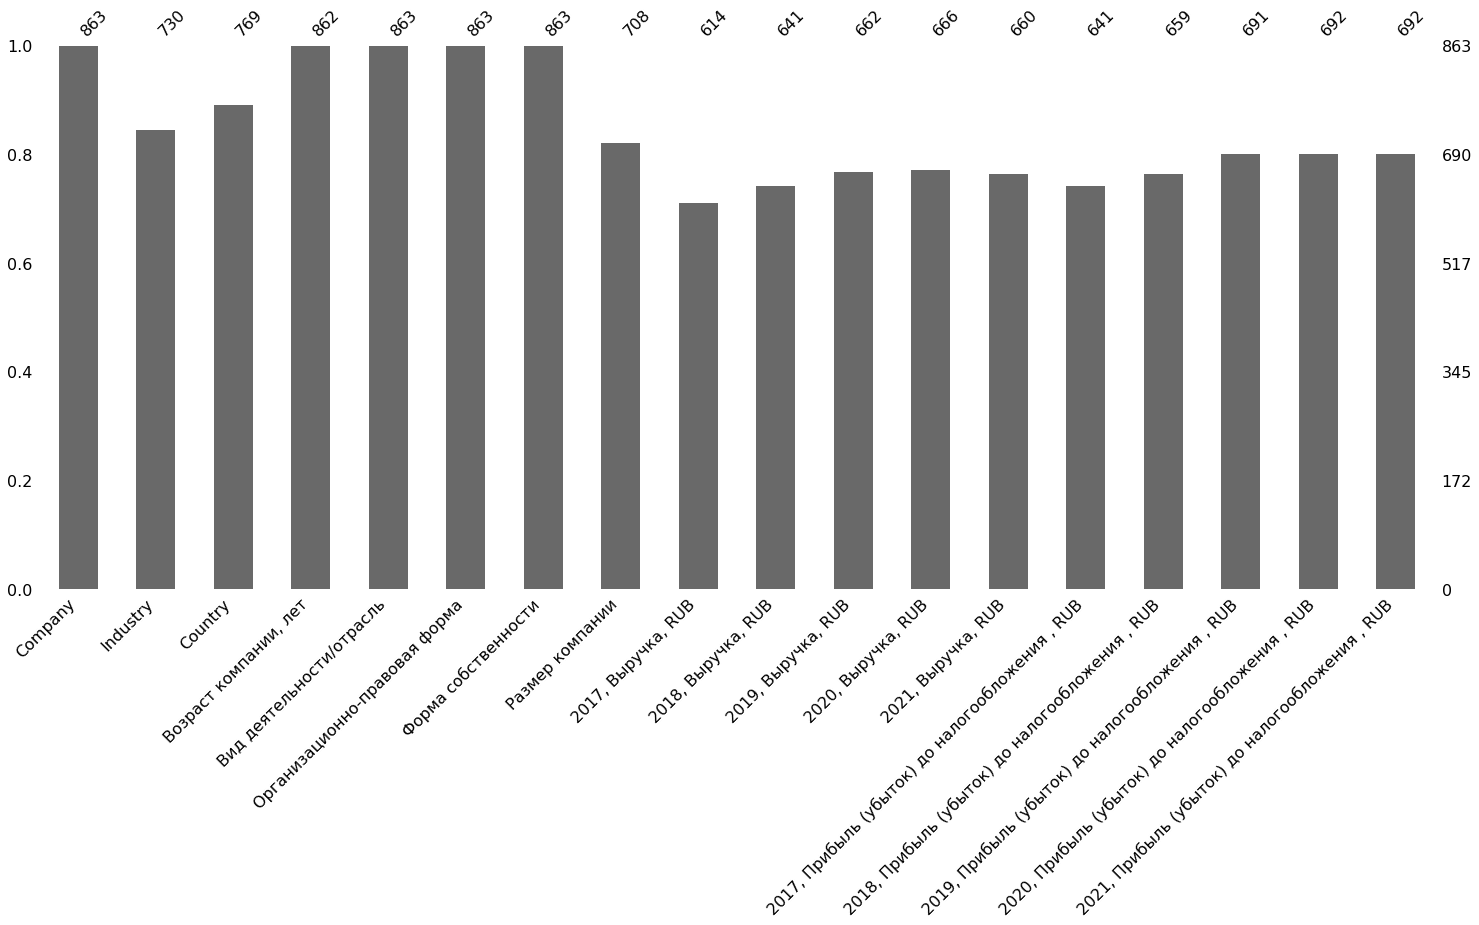

In [25]:
import missingno as msno
msno.bar(database)

###### Visualize the correlation between the number of missing values in different columns as a heatmap.

As we see below, there is a diagonal with values 0.9, which means that profit and insome highly correlates in terms of null values (if profit value is present, then income value is likely to be present too)

<AxesSubplot:>

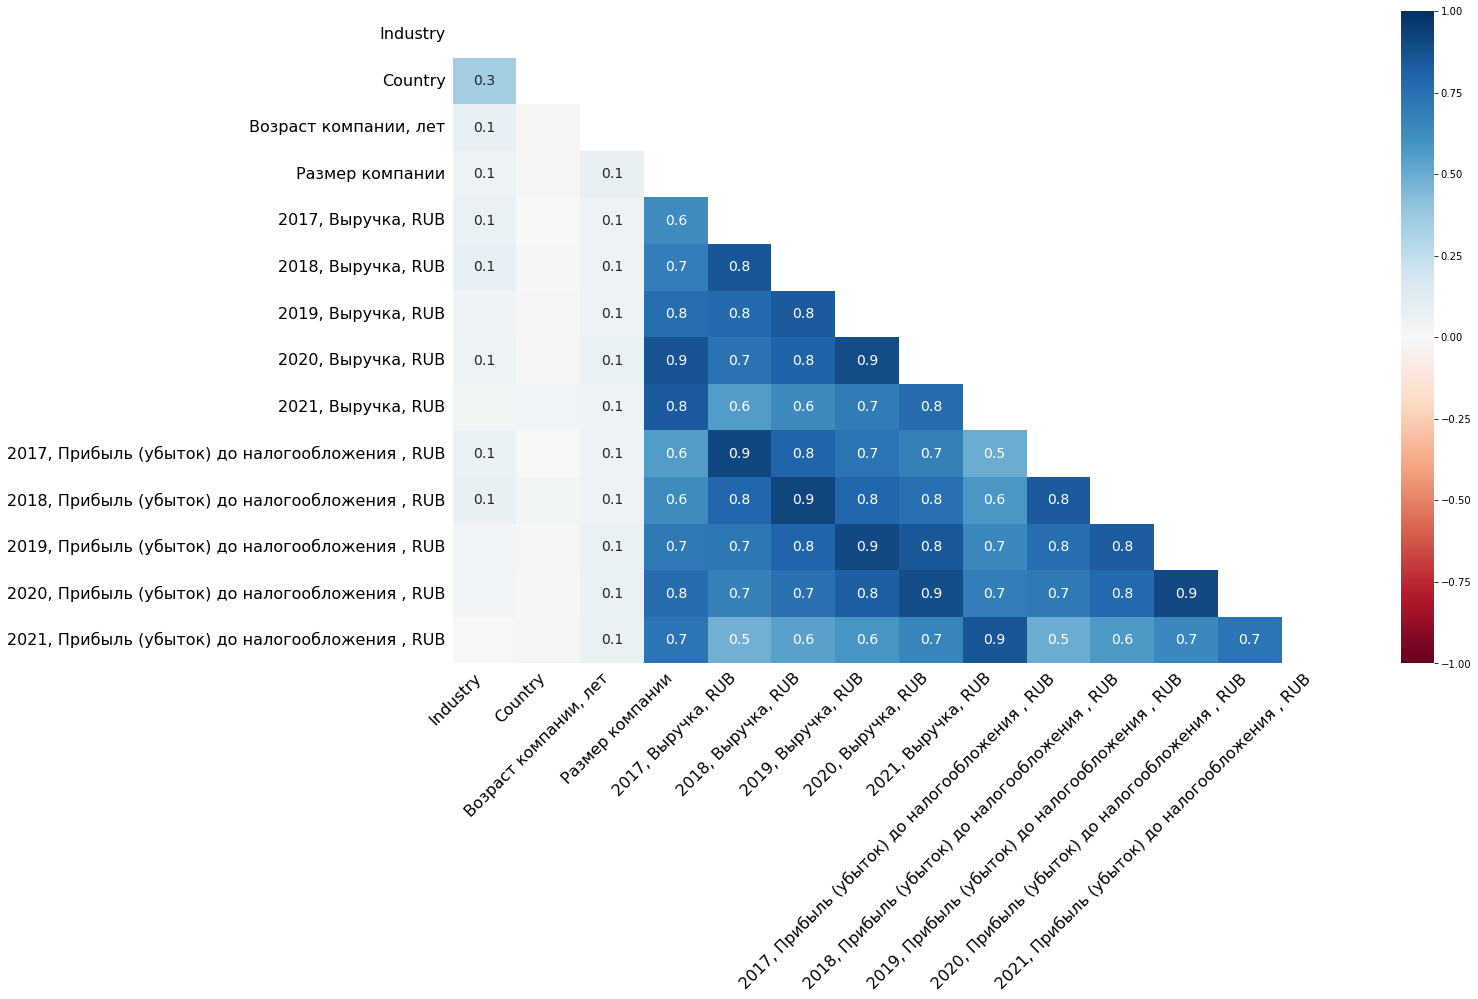

In [26]:
msno.heatmap(database)

In [27]:
database.dropna(thresh=database.shape[1] - 6, inplace=True)

In [28]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                             0
Industry                                           96
Country                                            69
Возраст компании, лет                               0
Вид деятельности/отрасль                            0
Организационно-правовая форма                       0
Форма собственности                                 0
Размер компании                                    17
2017, Выручка, RUB                                 76
2018, Выручка, RUB                                 48
2019, Выручка, RUB                                 28
2020, Выручка, RUB                                 23
2021, Выручка, RUB                                 55
2017, Прибыль (убыток) до налогообложения , RUB    61
2018, Прибыль (убыток) до налогообложения , RUB    38
2019, Прибыль (убыток) до налогообложения , RUB     7
2020, Прибыль (убыток) до налогообложения , RUB    10
2021, Прибыль (убыток) до нал

In [29]:
database.shape

(684, 18)

In [30]:
columns=['2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB', '2021, Выручка, RUB']
dfs = [database.dropna(subset=[col]) for col in columns]

In [31]:
# Drop rows with NaN values for each profit column separately
intersection_indices = set(dfs[0].index).intersection(*[df.index for df in dfs[1:]])

In [32]:
# Select rows with indices present in the intersection
df_filtered = database.loc[intersection_indices]
df_filtered.reset_index(drop=True, inplace=True)
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_filtered.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                             0
Industry                                           76
Country                                            57
Возраст компании, лет                               0
Вид деятельности/отрасль                            0
Организационно-правовая форма                       0
Форма собственности                                 0
Размер компании                                     0
2017, Выручка, RUB                                  0
2018, Выручка, RUB                                  0
2019, Выручка, RUB                                  0
2020, Выручка, RUB                                  0
2021, Выручка, RUB                                  0
2017, Прибыль (убыток) до налогообложения , RUB     1
2018, Прибыль (убыток) до налогообложения , RUB     2
2019, Прибыль (убыток) до налогообложения , RUB     0
2020, Прибыль (убыток) до налогообложения , RUB     3
2021, Прибыль (убыток) до нал

In [33]:
df_filtered.shape

(553, 18)